# **Import Libraries**

In [ ]:
pip install plotly==4.14.3

     |████████████████████████████████| 13.2 MB 152 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
pip install statsmodels

In [ ]:
pip install scikit-learn scipy

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd                         #for reading and storing data, pre-processing data
import numpy as np                          #for numerical computations, for instance, log, exp, sqrt, etc
import seaborn as sns
import matplotlib.pyplot as plt             #for visualization
%matplotlib inline
import plotly.express as px
import statsmodels.api as sm
import plotly.graph_objs as go              #plotly graphical object
from pylab import rcParams

from datetime import datetime

# **Data Description**

This dataset contain several closing stock price of several company focused on **Heavy Equipment** and **Mining Company**. Here is the data source: https://finance.yahoo.com/<br><br>**Data Content**:

* **Date**: Date for every observation, in this case is stock/shares
* **Open**: It is the price at which the financial security opens in the market when trading begins
* **High**: Highest closing price at which a stock trades during a regular trading session
* **Low**: Lowest closing price at which a stock trades during a regular trading session
* **Close**: Refers to the last price at which a stock trades during a regular trading session
* **Adj Close**: Amends a stock's closing price to reflect that stock's value after accounting for any corporate actions
* **Volume**: Is the number of shares of a security traded during a given period of time

# **Import Dataset**

Here I use PT United Tractors closing stock price as main object for this analysis and couple mining companies as comparison. As for mining companies, I used **PT Vale Indonesia** and **PT Adaro Indonesia**.

In [ ]:
# Parsing date function
def parser(x):
  return datetime.strptime(x, "%Y-%m-%d")

In [ ]:
# PT Adaro Indonesia
df_adaro = pd.read_csv("https://raw.githubusercontent.com/aliefamanu/project_stuff/main/ADRO.JK.csv", sep = ",", 
                       index_col=0, parse_dates=[0], date_parser=parser)

In [ ]:
adaro_vis = pd.read_csv("https://raw.githubusercontent.com/aliefamanu/project_stuff/main/ADRO.JK.csv", sep = ",")

In [ ]:
# PT Vale Indonesia
df_vale = pd.read_csv("https://raw.githubusercontent.com/aliefamanu/project_stuff/main/INCO.JK.csv", sep = ",",
                      index_col=0, parse_dates=[0], date_parser=parser)

In [ ]:
vale_vis = pd.read_csv("https://raw.githubusercontent.com/aliefamanu/project_stuff/main/INCO.JK.csv", sep = ",")

In [ ]:
# PT United Tractors Indonesia
df_untd = pd.read_csv("https://raw.githubusercontent.com/aliefamanu/project_stuff/main/UNTR.JK.csv", sep = ",",
                      index_col=0, parse_dates=[0], date_parser=parser)

In [ ]:
untd_vis = pd.read_csv("https://raw.githubusercontent.com/aliefamanu/project_stuff/main/UNTR.JK.csv", sep = ",")

# **Data Exploration and Preprocessing**

## Data Display

In [ ]:
# Display top 5 data rows
df_untd.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,21250.0,21250.0,21250.0,21250.0,17569.158203,0.0
2017-01-03,21200.0,21200.0,20575.0,21000.0,17362.462891,2865600.0
2017-01-04,21025.0,21425.0,20900.0,21400.0,17693.173828,2615000.0
2017-01-05,20900.0,22075.0,20900.0,21975.0,18168.574219,3816300.0
2017-01-06,21800.0,22125.0,21600.0,21700.0,17941.208984,1652600.0


Range of first 5 data is around IDR 20.000 for Open, High, Low, and Close. As for volume, it has up and down trend.

In [ ]:
# Dataframe info
df_untd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 892 entries, 2017-01-02 to 2020-06-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       891 non-null    float64
 1   High       891 non-null    float64
 2   Low        891 non-null    float64
 3   Close      891 non-null    float64
 4   Adj Close  891 non-null    float64
 5   Volume     891 non-null    float64
dtypes: float64(6)
memory usage: 48.8 KB


From info, we can see that:
* There are 892 entries but for every features we have it shown 891 non-null, we might want to check whether our data has missing value or not
* Dtype for dataframe seems right

In [ ]:
# Display last 5 data rows
df_untd.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-22,17350.0,17500.0,16850.0,16900.0,16207.601563,5854600.0
2020-06-23,16900.0,16900.0,16525.0,16575.0,15895.917969,2390200.0
2020-06-24,16575.0,16900.0,16525.0,16725.0,16039.771484,2318000.0
2020-06-25,16725.0,16850.0,16300.0,16475.0,15800.014648,3157400.0
2020-06-26,16700.0,16775.0,16425.0,16475.0,15800.014648,2213500.0


Range of first 5 data is around IDR 16.000 for Open, High, Low, and Close. As for volume, it has up and down trend.

## Duplicate Check

In [ ]:
print(f'Duplicated value: {df_untd.duplicated().sum()}')

Duplicated value: 22


In [ ]:
print(f'Data before duplication drop: {df_untd.shape[0]}')

df_untd_clean = df_untd.drop_duplicates().reset_index(drop=True)

print(f'Data after duplication drop: {df_untd_clean.shape[0]}')

Data before duplication drop: 892
Data after duplication drop: 870


In [ ]:
print(f'Duplicated value: {df_untd_clean.duplicated().sum()}')

Duplicated value: 0


## Missing Value Analysis

In [ ]:
n_missing = pd.DataFrame(df_untd_clean.isnull().sum().reset_index())
n_missing.columns=['Column_Name','Percentage_Missing']
n_missing['Percentage_Missing']=n_missing['Percentage_Missing'].apply(lambda x: x*100/df_untd_clean.shape[0])
n_missing.sort_values(by = ['Percentage_Missing'], ascending=False).loc[n_missing['Percentage_Missing']>0,:]

,Column_Name,Percentage_Missing
0,Open,0.114943
1,High,0.114943
2,Low,0.114943
3,Close,0.114943
4,Adj Close,0.114943
5,Volume,0.114943


In [ ]:
for column in df_untd_clean.columns:
    print(f"============= {column} =================")
    display(df_untd_clean[column].value_counts())
    print()

============= Open =================


27000.0    9
21700.0    8
32300.0    8
28000.0    8
26100.0    8
          ..
34950.0    1
35175.0    1
22100.0    1
31925.0    1
22400.0    1
Name: Open, Length: 480, dtype: int64


============= High =================


28900.0    7
33400.0    7
28000.0    6
27200.0    6
32700.0    6
          ..
27425.0    1
34875.0    1
40500.0    1
34075.0    1
36650.0    1
Name: High, Length: 502, dtype: int64


============= Low =================


26500.0    7
32500.0    6
26000.0    6
27500.0    6
33000.0    6
          ..
18000.0    1
16500.0    1
20275.0    1
22875.0    1
39950.0    1
Name: Low, Length: 506, dtype: int64


============= Close =================


32000.0    11
33000.0     8
26500.0     8
27800.0     7
33500.0     7
           ..
38800.0     1
39975.0     1
21750.0     1
14250.0     1
36175.0     1
Name: Close, Length: 492, dtype: int64


============= Adj Close =================


27091.277344    7
28996.128906    6
28227.250000    5
23069.306641    5
24331.589844    4
               ..
12798.015625    1
17582.962891    1
23805.226563    1
30541.181641    1
29779.236328    1
Name: Adj Close, Length: 652, dtype: int64


============= Volume =================


0.0           37
3282700.0      2
2459400.0      2
3862400.0      2
3235800.0      1
              ..
5016000.0      1
11915700.0     1
8409500.0      1
2823200.0      1
3678200.0      1
Name: Volume, Length: 830, dtype: int64

In [ ]:
# Print all rows that has "null" or 0 in at least one of the columns
df_untd_clean[df_untd_clean.isin(['null',0]).any(axis=1)]

,Open,High,Low,Close,Adj Close,Volume
0,21250.0,21250.0,21250.0,21250.0,17569.158203,0.0
32,23025.0,23025.0,23025.0,23025.0,19036.697266,0.0
66,29150.0,29150.0,29150.0,29150.0,24100.748047,0.0
75,27850.0,27850.0,27850.0,27850.0,23025.933594,0.0
102,27775.0,27775.0,27775.0,27775.0,23308.289063,0.0
118,27450.0,27450.0,27450.0,27450.0,23035.550781,0.0
152,29975.0,29975.0,29975.0,29975.0,25154.490234,0.0
163,30300.0,30300.0,30300.0,30300.0,25427.224609,0.0
177,31975.0,31975.0,31975.0,31975.0,26832.855469,0.0
228,33500.0,33500.0,33500.0,33500.0,28361.181641,0.0


After calculcating percentage of missing value, it seems like the data contain missing value. This missing value is not really missing or "NaN", it happened because there are volume with value == 0. Instead of imputing, I'd drop the null value.

In [ ]:
df_untd_clean = df_untd_clean.dropna(axis =0, how="any")

# **Exploratory Data Analysis**

## United Tractors

### Closing

In [ ]:
fig1 =  px.line(untd_vis, x='Date', y='Close', title='United Tractor Closing Price',
                labels={"Close":"Price in Rupiah"})

fig1.update_layout(
    title="Plot Title",
    xaxis_title="Date",
    yaxis_title="Price in Rupiah (Rp)",
    font=dict(
        size=15,
        color="Black"
    )
)

fig1.update_layout(title = "United Tractor Closing Price<br><sup>Daily (Jan-June) 2017-2020</sup>", title_x = 0.5)
    
fig1.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig1.show()

From plot above, it can be seen that:
* United Tractors closing prices are quite ranging between starting point and end point
* The data has **uptrend** and **downtrend** as well
* Highest price point is **Rp40.425,00** at **23 Jan 2018** and lowest point is **Rp12.600,00** at **19 Mar 2020**
* As for the uptrend, United Tractors closing price has positive price changes of **88.25%** from Rp21.250,00 to Rp40.000,00 between early 2017-early 2018
* As for the downtrend, closing price has negative price changes of **-59.03%** from Rp39.975,00 to Rp16.375,00 between middle 2018-middle 2020

### Volume

In [ ]:
fig2 =  px.line(untd_vis, x='Date', y='Volume', title='United Tractor Trading Volume',
                labels={"Volume":"Amount Shares on Market"})

fig2.update_layout(
    title="United Tractors Trading Volume",
    xaxis_title="Date",
    yaxis_title="Trading Volume",
    font=dict(
        size=15,
        color="Black"
    )
)

fig2.update_layout(title = "United Tractors Trading Volume<br><sup>Daily (Jan-June) 2017-2020</sup>", title_x = 0.5)

fig2.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig2.show()

From plot above, it can be seen that:
* United Tractors trading volume are quite ranging from starting point to end point
* Highest trading volume is **26.4821M** at 14 Jan 2019 of all time period
* For some reason, trading volume has lowest point at every **middle of the year** while highest seems always at **early year**. This might required further action

## United Tractors ft Mining Company

In [ ]:
from IPython.display import HTML, display

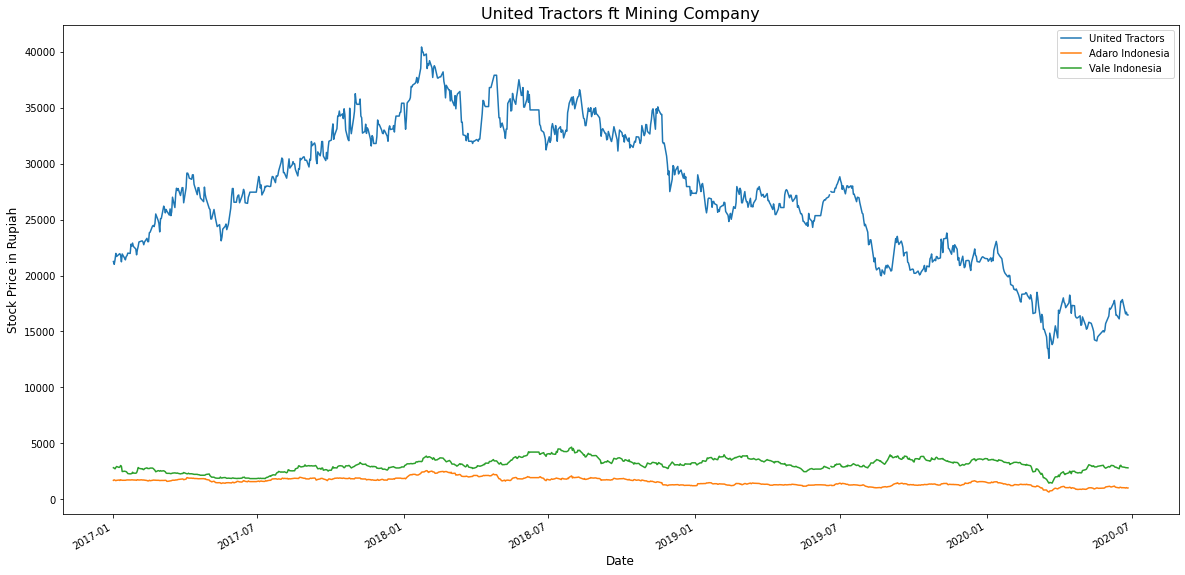

In [ ]:
plt.figure(figsize=(20,10))

display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))

df_untd.Close.plot()
df_adaro.Close.plot()
df_vale.Close.plot()
plt.legend(['United Tractors','Adaro Indonesia','Vale Indonesia'])
plt.title('United Tractors ft Mining Company', size = 16)
plt.ylabel('Stock Price in Rupiah', size = 12)
plt.xlabel('Date', size = 12)
plt.show()

From plot above, it can be seen that:
* As for mining company, PT Vale Indonesia **outperform** PT Adaro Indonesia for all time. It can be seen from it's stock price that is always higher
* As for relationship between United Tractors with Vale Indonesia and Adaro Indonesia, I believe that there is no strong relationship between those 3 companies for stock prices. Because it has no unique pattern or distinct pattern
* For trend, somehow there are several same pattern with these 3 companies, for instance at the middle of year 2017

# **Data Modeling**

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

# model metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

# modeling libraries
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from fbprophet import Prophet

## Initial Preprocessing

In [ ]:
df_untd = df_untd.dropna(axis =0, how="any")
data_model = df_untd.drop(['Open','High','Low','Adj Close', 'Volume'], axis=1)
data_model

,Close
Date,
2017-01-02,21250.0
2017-01-03,21000.0
2017-01-04,21400.0
2017-01-05,21975.0
2017-01-06,21700.0
...,...
2020-06-22,16900.0
2020-06-23,16575.0
2020-06-24,16725.0


In [ ]:
# splitting data test and data train
X = data_model.values
size = int(len(X) * 0.80)  # 70 % 
# Training set
train = X[:size]
# testing set
test  = X[size:len(X)]
print(f'Data size             : %d' % len(data_model))
print(f'Data train            : %d' % len(train))
print(f'Data test/validation  : %d' % len(test))

Data size             : 891
Data train            : 712
Data test/validation  : 179


## 1). ARIMA Model

### Stationarity Check

We can check stationarity thru ACF plot and Dickey-Fuller Test. We want to have a cuts-off pattern at ACF plot and p-value lower than significance level of 5% (0.05)

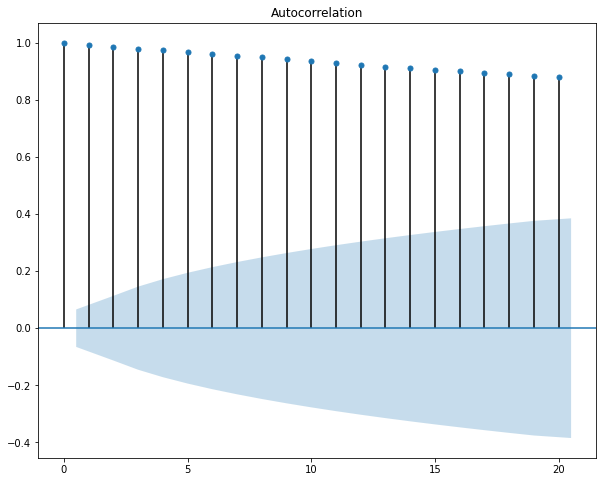

In [ ]:
# ACF plot
display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))

rcParams['figure.figsize'] = 10,8
plot_acf(data_model.Close, lags = 20);

From ACF plot above, we can saw a slow-decay or dying down exponentially pattern. That indicates that our data **is not yet stationary**. But, we need to test our data with **Dickey-Fuller** to make sure about stationarity condition.

In [ ]:
# Dickey-Fuller test
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = None)
    dfoutput = pd.Series(dftest[0:4], index=['ADF Statistic', 'p-value', '#Lags Used', 'Number of Obs Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

test_stationarity(data_model.Close)

Results of Dickey-Fuller Test:
ADF Statistic            -0.912058
p-value                   0.783976
#Lags Used                2.000000
Number of Obs Used      888.000000
Critical Value (1%)      -3.437735
Critical Value (5%)      -2.864800
Critical Value (10%)     -2.568506
dtype: float64


From Dickey-Fuller test result, we can clearly say that our data is **not stationary yet**. Because p-value of the test is still greater than significance level of 5% or 0.05. We might want to fix this with **differencing** process.

### Convert Series to Stationary

In [ ]:
# Calculate the differnce of a element compared with a prevous row element
untd_diff = data_model.diff(periods=1)
# Drop rows with NAN value. First row element will have NAN value because there is no previous element for calculating the differnce.
untd_diff = untd_diff.dropna()
# Display first five rows
untd_diff.head()

,Close
Date,
2017-01-03,-250.0
2017-01-04,400.0
2017-01-05,575.0
2017-01-06,-275.0
2017-01-09,200.0


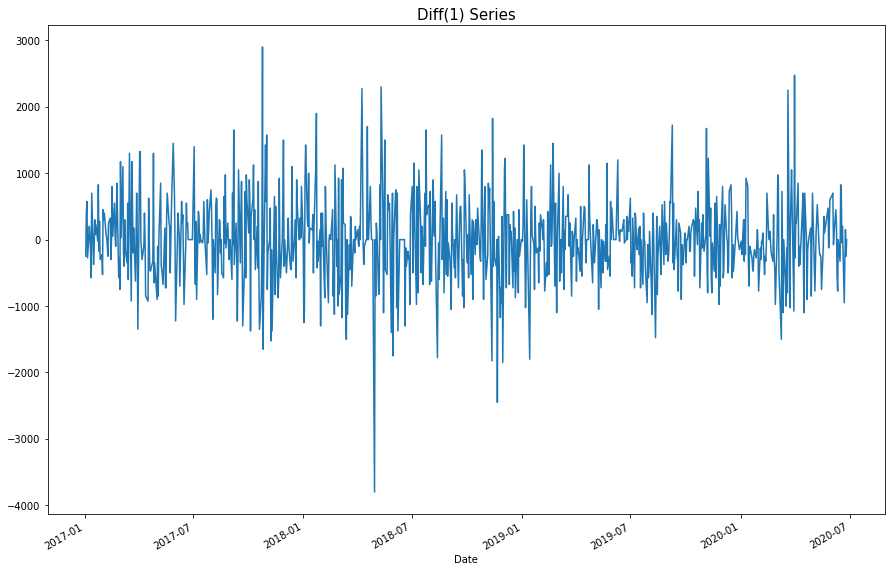

In [ ]:
# Plot the data after differencing
plt.figure(figsize=(15,10))
display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))
untd_diff.Close.plot()
plt.title("Diff(1) Series", size = 15)
plt.show()

According to plot above, our data seems stationary already. Most of data fluctuated around **mean** score and **variance** is quite constant over time.

### Stationary Check (2)

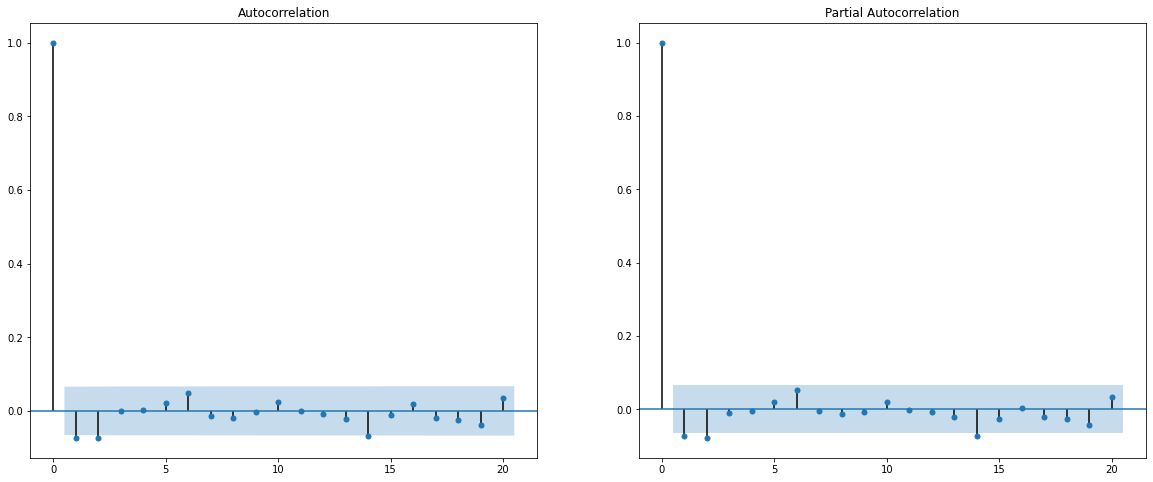

In [ ]:
# ACF and PACF plots
fig, ax = plt.subplots(1,2,figsize=(20,8))
display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))
plot_acf(untd_diff.Close, lags=20, ax=ax[0])
plot_pacf(untd_diff.Close, lags=20, ax=ax[1])
plt.show()

From plot above, it can be seen that:
* ACF Plot shown **cuts-off** pattern which indicates the data is already stationare. From this plot, we also can determine tentative MA(q) ordo. Because it's significant at lag 0, 1, 2 so the candidates MA(q) model are: MA(0), MA(1), and MA(2)
* PACF Plot shown **cuts-off** pattern which indicates the data is already stationare. From this plot, we also can determine tentative AR(p) ordo. Because it's significant at lag 0, 1, 2 so the candidates AR(p) model are: AR(0), AR(1), and AR(2)
* Since ARIMA model consist of AR and MA integrated by differencing process, our ARIMA candidates are: ARIMA(0,1,0), ARIMA(0,1,1), ARIMA(0,1,2), ARIMA(1,1,1), ARIMA(1,1,2), ARIMA(2,1,1), ARIMA(2,1,2), etc

In [ ]:
# Dickey-Fuller test
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = None)
    dfoutput = pd.Series(dftest[0:4], index=['ADF Statistic', 'p-value', '#Lags Used', 'Number of Obs Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

test_stationarity(untd_diff.Close)

Results of Dickey-Fuller Test:
ADF Statistic           -23.575020
p-value                   0.000000
#Lags Used                1.000000
Number of Obs Used      888.000000
Critical Value (1%)      -3.437735
Critical Value (5%)      -2.864800
Critical Value (10%)     -2.568506
dtype: float64


From Dickey-Fuller test result, we can clearly say that our data is already stationare. Because p-value is already smaller than significance level of 5% or 0.05

### Model Fitting and Predict

In [ ]:
model = ARIMA(data_model.Close, order=(2,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  890
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -7003.143
Method:                       css-mle   S.D. of innovations            632.542
Date:                Fri, 15 Oct 2021   AIC                          14018.285
Time:                        23:39:39   BIC                          14047.033
Sample:                             1   HQIC                         14029.273
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -5.3751     18.749     -0.287      0.774     -42.123      31.372
ar.L1.D.Close     0.7963      0.291      2.734      0.006       0.225       1.367
ar.L2.D.Close    -0.5282      0.242     

In [ ]:
stock_history = [x for x in train]
preds = []

# order=(p,d,q)
p = 2    #AR parameters/Lags
q = 1    # Differencing order
d = 2    # MA parameters

#arima_model = ARIMA(train, order=(5,1,0))
#arima_model_fit = arima_model.fit()

for i in range(len(test)):
    # initiate ARIMA model
    arima_model = ARIMA(stock_history, order=(p,q,d))
    # fit ARIMA mode;
    arima_model_fit = arima_model.fit()
    # forecast price
    output = arima_model_fit.forecast()[0]
    # append the forcasted price to a list
    preds.append(output)

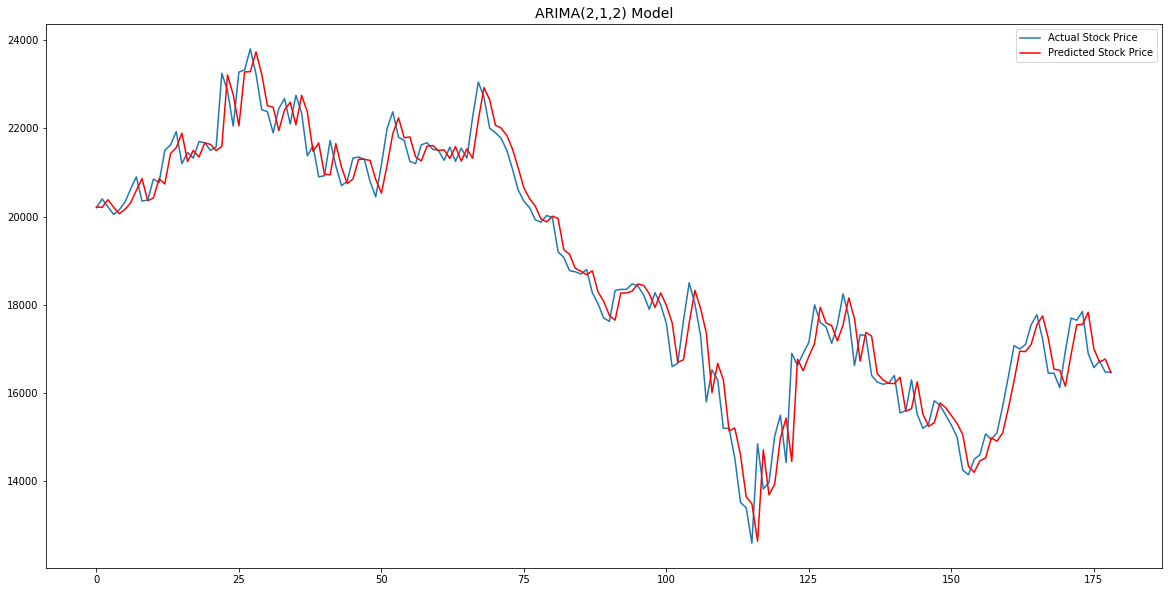

In [ ]:
display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))
plt.figure(figsize=(20,10))
plt.title("ARIMA(2,1,2) Model",fontsize=14)
plt.plot(test, label='Actual Stock Price')
plt.plot(preds, color='r', label='Predicted Stock Price')
plt.legend()
plt.show()

In [ ]:
print("Mean Squared Error : %.2f" % MSE(test, preds))

Mean Squared Error : 322447.16


From plot above, we can see that ARIMA worked quite well. It's supported by forecast value which quite similar with the actual value. The more similar the pattern become, the better the model.

### Forecast (h=5)

In [ ]:
train_test = np.concatenate((train, test))
stock_history = [x for x in train_test]
preds = []
forecasting_days = 5

for i in range(forecasting_days):
    # initiate ARIMA model
    arima_model = ARIMA(stock_history, order=(p,q,d))
    # fit ARIMA mode;
    arima_model_fit = arima_model.fit()
    # forecast price
    output = arima_model_fit.forecast()[0]
    # append the forecasted price to a stock history data
    stock_history.append(output)  
    # append the forcasted price to a prediction list
    preds.append(output)

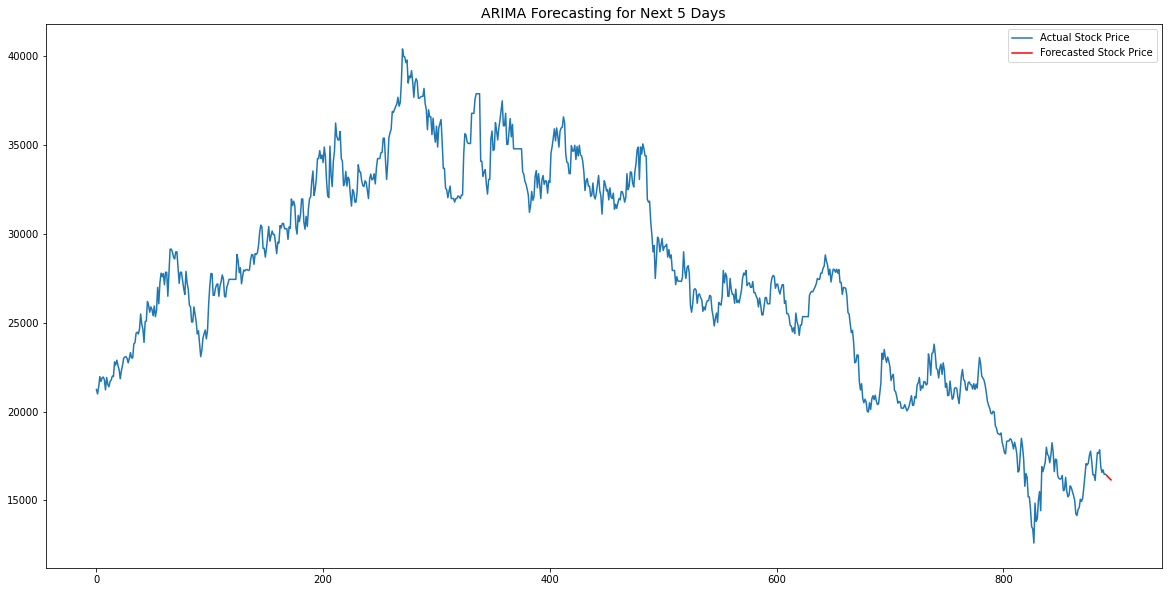

In [ ]:
start = len(train_test)
end = len(train_test) + int(forecasting_days)
history = pd.Series(stock_history)

plt.figure(figsize=(20,10))
display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))
plt.title("ARIMA Forecasting for Next 5 Days",fontsize=14)
plt.plot(history[0:start], label='Actual Stock Price')
plt.plot(history[start:end], color='r', label='Forecasted Stock Price')
plt.legend()
plt.show()

## 2). Prophet Model

### Forecast (h=5)

In [ ]:
d_new = df_untd.groupby('Date')['Close'].sum().reset_index()
d_new.columns = ['ds', 'y']

m = Prophet()
m.fit(d_new)

future = m.make_future_dataframe(periods=5)
forecast = m.predict(future)

fig = go.Figure()

fig.add_trace(go.Scatter( x = forecast['ds'], y = forecast['yhat'],
                        mode='lines+markers',name='Predicted Cases',marker_color='DarkSlateGray'))
fig.add_trace(go.Scatter( x = d_new['ds'], y = d_new['y'],
                        mode='lines+markers',name='Actual Cases',marker_color='Tomato'))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
